<a href="https://colab.research.google.com/github/chelaam/House_price_evaluator/blob/main/House_price_evaluator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Extracting and Cleaning the data

In [105]:
df = pd.read_csv("/content/house_price_regression_dataset.csv")

df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [106]:
X = df.drop('House_Price',axis=1)
Y = df['House_Price']


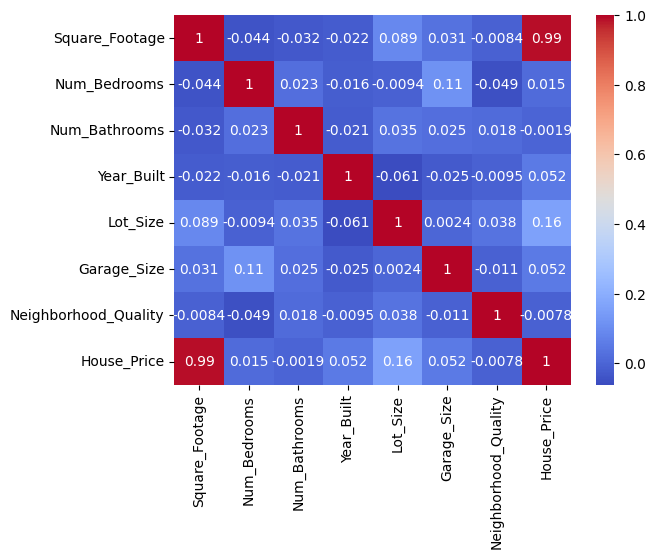

In [107]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [108]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

PCA()

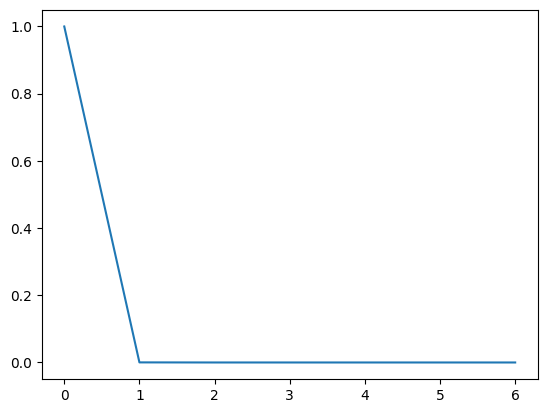

In [109]:
plt.plot(pca.explained_variance_ratio_)
plt.show()


In [110]:
pca = PCA(n_components=1)
pca.fit_transform(X)


array([[-1455.41999048],
       [ 1456.56720529],
       [  776.56719426],
       [-1849.41830079],
       [ 2110.57565063],
       [ 1128.57647162],
       [  855.56893267],
       [  603.58352058],
       [-2185.42591629],
       [ -630.41982226],
       [-1546.42899033],
       [   75.57985729],
       [  117.58299789],
       [-1131.42250472],
       [ 1069.57923385],
       [ 1801.57115305],
       [  588.58158803],
       [-1841.42154582],
       [-1233.41059453],
       [  242.56677362],
       [ -268.42176798],
       [  431.57134637],
       [-1340.43187223],
       [ -509.43185773],
       [-2126.42520947],
       [  418.58444243],
       [  689.58491191],
       [ -416.41906276],
       [-1048.43037645],
       [ -787.4147208 ],
       [  886.57869966],
       [ 1240.575913  ],
       [ 1574.58793731],
       [-1669.42604508],
       [  572.57789984],
       [  119.5679339 ],
       [-1715.43354235],
       [   47.58902064],
       [ -254.4208892 ],
       [-2074.42572874],


In [111]:
sum(pca.explained_variance_ratio_)

0.9997216570215405

In [112]:
pca.get_params

<bound method BaseEstimator.get_params of PCA(n_components=1)>

In [113]:
x_scaled = pca.fit_transform(X)

In [114]:
x_scaled

array([[-1455.41999048],
       [ 1456.56720529],
       [  776.56719426],
       [-1849.41830079],
       [ 2110.57565063],
       [ 1128.57647162],
       [  855.56893267],
       [  603.58352058],
       [-2185.42591629],
       [ -630.41982226],
       [-1546.42899033],
       [   75.57985729],
       [  117.58299789],
       [-1131.42250472],
       [ 1069.57923385],
       [ 1801.57115305],
       [  588.58158803],
       [-1841.42154582],
       [-1233.41059453],
       [  242.56677362],
       [ -268.42176798],
       [  431.57134637],
       [-1340.43187223],
       [ -509.43185773],
       [-2126.42520947],
       [  418.58444243],
       [  689.58491191],
       [ -416.41906276],
       [-1048.43037645],
       [ -787.4147208 ],
       [  886.57869966],
       [ 1240.575913  ],
       [ 1574.58793731],
       [-1669.42604508],
       [  572.57789984],
       [  119.5679339 ],
       [-1715.43354235],
       [   47.58902064],
       [ -254.4208892 ],
       [-2074.42572874],


In [118]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2 )

Mean squared error: 34162


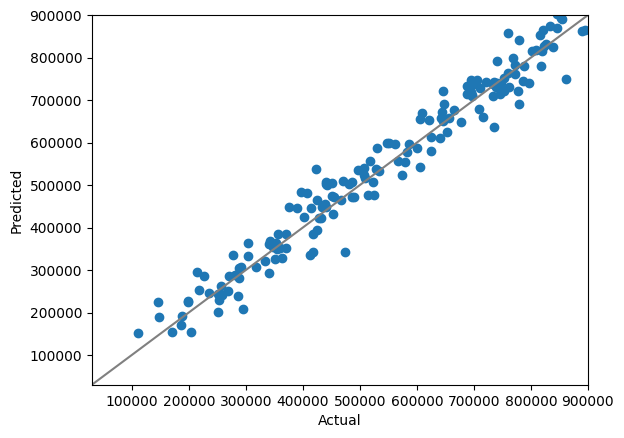

In [116]:
model = RandomForestRegressor()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mse = mean_absolute_error(y_test,y_pred)


print(f"Mean squared error: {format(int(mse))}")


plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xlim(30000,900000)
plt.ylim(30000,900000)
plt.plot([30000,900000],[30000,900000],color='grey')
plt.show()